# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [222]:
print("""Business problem: Predicting the used car prices------- 
      
    1. The The goal is to develop a predictive model that learns the relationship between the input features/variables and the continuous target variable 
       "used car price" using historical data. Since this is about predicting continuous variable (price), its a "Regression problem". 
    
      I will be using the Regression techniques to accurately predict the price of the used car with the following features in the given dataset:
      - Target Variable: Used Car Price
      - Numeric Features: Mileage/Odometer readings, Age of the car(Year)
      - Categorical Features: Manufacturer, Model, Cylinders, Condition, Fuel, drive, Transmission Status, type of care etc.

    2. This task involves data preprocessing (cleaning, scaling, missing values, duplicates etc..), feature engineering, and selection, followed
       by the application of regression techniques (e.g., Linear Regression, Ridge Regression, Lasso Regression) to identify significant predictors of car prices.
    3. The model will be trained on a dataset containing historical data of used car sales, including their prices and associated features.

    4. The model will be evaluated using metrics like "mean_squared_error" and "R^2" to ensure its accuracy and reliability in predicting used car prices.

    5. SUCCESS CRITERIA: The success of this project will be measured by the model's ability to accurately predict used car prices, which is:
      - MSE's of Train and Test datasets.
      - R^2 values on the Train and validation dataset.
      - Number and Percentages of car prices predicted within 5%, 10% and 15% Range of Actual prices
      
    6. HYPOTHESIS: I have the following Hypothesis basis my understanding of the used car market and the features provided in the dataset:

      - The price of a used car is influenced by its mileage, age, manufacturer, model, condition, fuel type, drive type, and transmission status.
      - Cars with lower mileage and newer models are expected to have higher prices.
      - The condition of the car (e.g., excellent, good, fair, or poor) significantly impacts its price.
      - Different manufacturers and models have varying price ranges, with some brands being more expensive than others.
      - Fuel type (e.g., petrol, diesel, electric) and drive type (e.g., 4WD, FWD, RWD) may also affect the price.
      - Transmission status (e.g., automatic, manual) can influence the price, with automatic cars often being more expensive.""")

Business problem: Predicting the used car prices------- 

    1. The The goal is to develop a predictive model that learns the relationship between the input features/variables and the continuous target variable 
       "used car price" using historical data. Since this is about predicting continuous variable (price), its a "Regression problem". 

      I will be using the Regression techniques to accurately predict the price of the used car with the following features in the given dataset:
      - Target Variable: Used Car Price
      - Numeric Features: Mileage/Odometer readings, Age of the car(Year)
      - Categorical Features: Manufacturer, Model, Cylinders, Condition, Fuel, drive, Transmission Status, type of care etc.

    2. This task involves data preprocessing (cleaning, scaling, missing values, duplicates etc..), feature engineering, and selection, followed
       by the application of regression techniques (e.g., Linear Regression, Ridge Regression, Lasso Regression) to ide

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [224]:
vehicles = pd.read_csv("/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/data/vehicles.csv")
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [225]:
# Exploring the infomation on columns, data types, and non-null counts
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [226]:
vehicles.duplicated().sum()  # Checking for duplicates

np.int64(0)

In [227]:
# Checking for Price column with max and min values ---- Car Prices are Zero's and some are in Dollar Bn's that needs to be cleaned
vehicles["price"].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

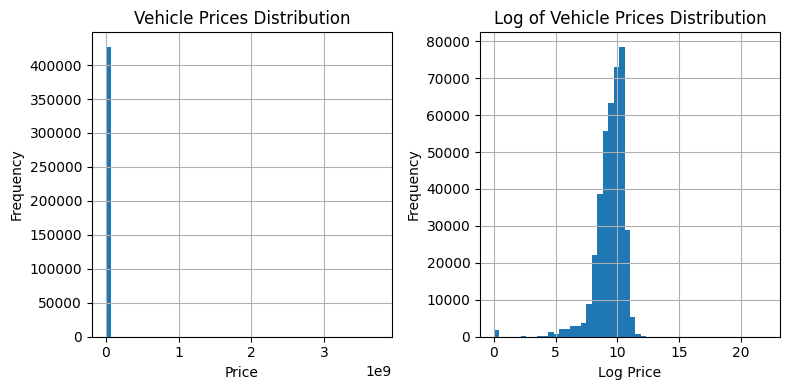

<Figure size 640x480 with 0 Axes>

In [228]:
# KEY FINDINGS: The analysis of the vehicle price distribution heavilly right skewed and makes sense to use Log Transformation of "Price".
# histogram of vehicle price and log of Vehicle price
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
vehicles['price'].hist(bins=50)
plt.title('Vehicle Prices Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
# Filter out non-positive prices before taking log
vehicles[vehicles['price'] > 0]['price'].apply(np.log).hist(bins=50)
plt.title('Log of Vehicle Prices Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/log_vehicle_price_distribution.png')



Total number of cars with price less than or equal to 1K: 47524
Total number of cars with price greater than 1K and less or equal to 500K: 379288
Total number of cars with price greater than 500K: 68


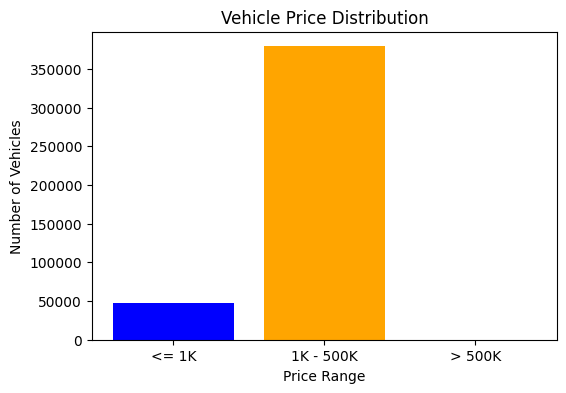

<Figure size 640x480 with 0 Axes>

In [229]:
# 47K cars with price less than 1K AND 426K cars with prices greater than 1k and less than 200K
vehicles_prices_less_equal_Zero = vehicles[vehicles["price"] <= 1000]
vehicles_prices_above_1K_and_below_500k = vehicles[(vehicles["price"] > 1000) & (vehicles["price"] <= 500000)]
vehicles_prices_greater_500K = vehicles[vehicles["price"] > 500000]

print(f"Total number of cars with price less than or equal to 1K: {vehicles_prices_less_equal_Zero.shape[0]}")
print(f"Total number of cars with price greater than 1K and less or equal to 500K: {vehicles_prices_above_1K_and_below_500k.shape[0]}")
print(f"Total number of cars with price greater than 500K: {vehicles_prices_greater_500K.shape[0]}")
# visualizing the vehicle distributio
plt.figure(figsize=(6, 4))
plt.bar(["<= 1K", "1K - 500K", "> 500K"], [vehicles_prices_less_equal_Zero.shape[0], vehicles_prices_above_1K_and_below_500k.shape[0], vehicles_prices_greater_500K.shape[0]], color=["blue", "orange", "green"])
plt.title("Vehicle Price Distribution")
plt.xlabel("Price Range")
plt.ylabel("Number of Vehicles")
plt.show()
# save the image below
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/vehicle_price_distribution.png')

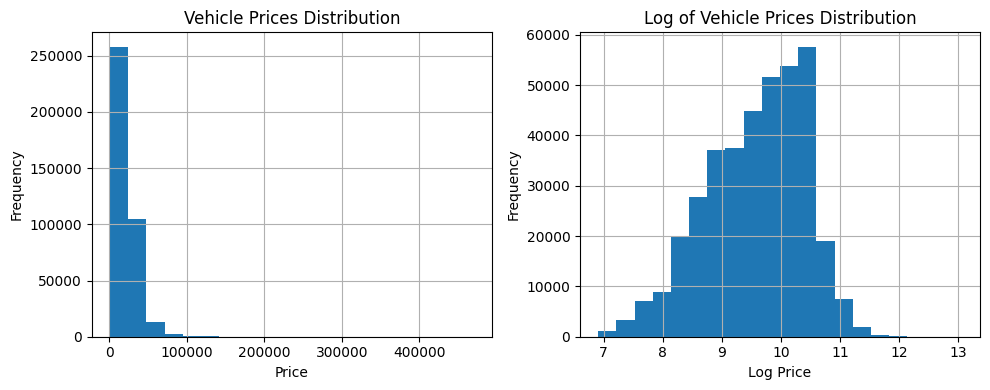

In [230]:
# histogram of vehicle price and log of Vehicle price
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
vehicles_prices_above_1K_and_below_500k['price'].hist(bins=20)
plt.title('Vehicle Prices Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
# Filter out non-positive prices before taking log
np.log(vehicles_prices_above_1K_and_below_500k['price']).hist(bins=20)
plt.title('Log of Vehicle Prices Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/log_vehicle_price_distribution.png')
plt.show()

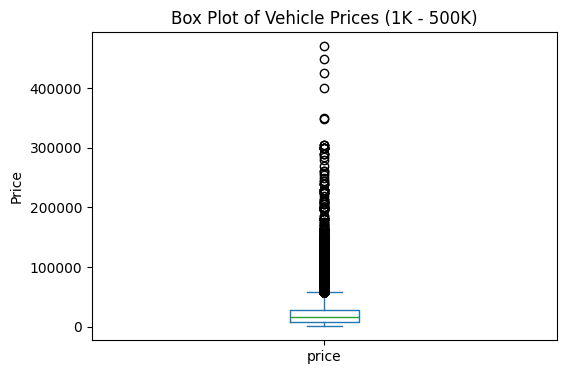

In [231]:
# KEY FINDINGS: 

#  1. Most of car prices sold are in the range of 5k to 30k. 
#  2. Over 60k price is an outlier but will be kept for now as it is a valid price range for luxury cars.
#  3. For analysis purposes, will be focusing on the vehicles with prices between 1K and 200K, as these represent the majority of the dataset.

# Visualizing the distribution of vehicle prices in the range of 1K to 200K (Need to delete the Outliers greater than 1Mn price cars)
vehicles_prices_above_1K_and_below_500k["price"].plot(kind='box', figsize=(6, 4))
plt.title("Box Plot of Vehicle Prices (1K - 500K)")
plt.ylabel("Price")
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/log_vehicle_price_boxplot.png')

plt.show()


In [232]:
# KEY FINDINGS: Descriptive Statistics of the vehicles with prices above 1K and below 500K
# 1. Price and Odometer readings are the Right Skewed, indicating that most vehicles are priced lower and have lower mileage. 
# 2. The mean price is around 20K, indicating that most vehicles are priced in the lower range.
# 3. The standard deviation is around 20K, suggesting a wide range of prices.
# 4. The minimum price is 1K, and the maximum price is 500K, which aligns with the filtering criteria.
# 5. Odometer readings range from 1K to 300K, with a mean of around 100K, indicating that most vehicles have moderate mileage.
# 6. The 25th percentile of prices is around 10K, while the 75th percentile is around 30K, suggesting that most vehicles are priced between these values.

vehicles_prices_above_1K_and_below_500k.describe()

,id,price,year,odometer
count,3.792880e+05,379288.000000,378124.000000,3.772100e+05
mean,7.311457e+09,19615.345592,2010.999706,9.799912e+04
std,4.474150e+06,15249.183045,9.584616,1.841445e+05
min,7.207408e+09,1002.000000,1900.000000,0.000000e+00
25%,7.308070e+09,7995.000000,2008.000000,3.812300e+04
50%,7.312558e+09,15995.000000,2013.000000,8.749000e+04
75%,7.315237e+09,27990.000000,2017.000000,1.360000e+05
max,7.317101e+09,470000.000000,2022.000000,1.000000e+07


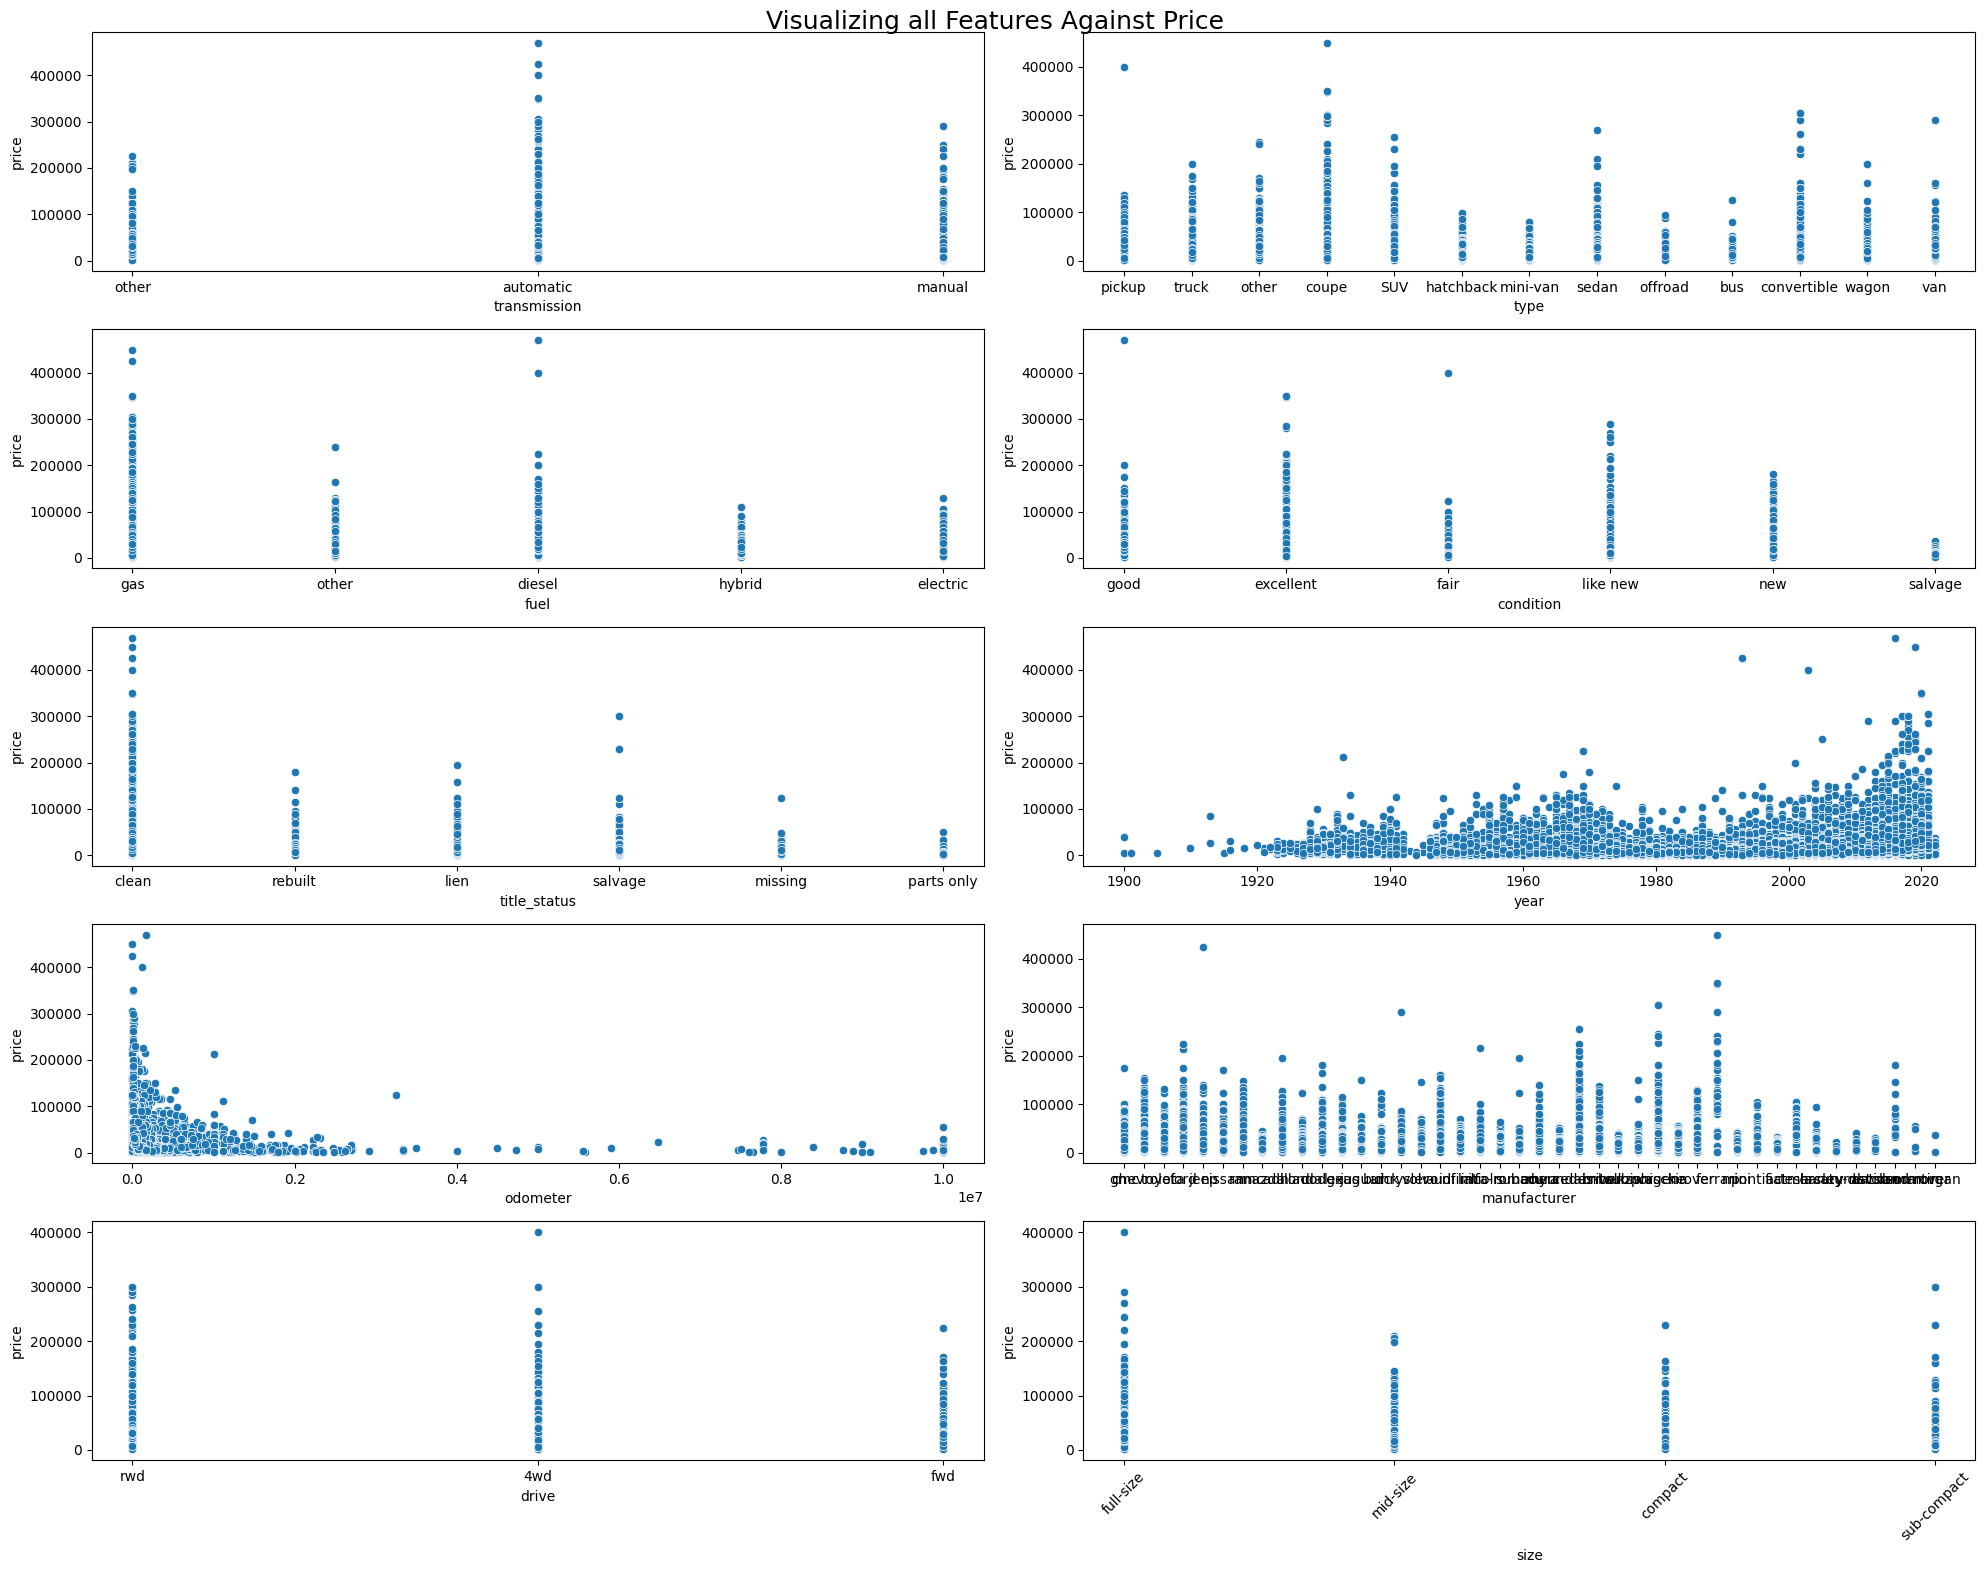

In [233]:
# KEY FINDINGS:

# 1. Used car prices are driven by Age, Odometer, Manufacturer, Model, transmission, fuel type, Title Status, and Condition
# 2. The average price is highest for vehicles with title status "Clean"
# 3. "Automatic transmission" vehicles have a higher average price compared to manual transmission vehicles and others
# 4. The average price is highest for vehicles with fuel type "Gas" and "Hybrid"
# 5. The average price is highest for vehicles with condition "Good" and "Like New"
# 6. The car price tends to decrease with the increase in odometer reading
# 7. The car price is tends to increase with the "latest Year"
# 8. The average price is highest for vehicles with manufacturer "Chevrolet", "Ford", and "Toyota"
# 9. The average price is highest for vehicles with drive type as "4WD"
# 10. The average price is highest for vehicles with size as "Fullsize" and "Midsize"

fig, axes = plt.subplots(5, 2, figsize=(20, 16))
sns.scatterplot(x='transmission', y=(vehicles_prices_above_1K_and_below_500k['price']), data=vehicles_prices_above_1K_and_below_500k, ax=axes[0, 0])
sns.scatterplot(x='type', y=(vehicles_prices_above_1K_and_below_500k['price']), data=vehicles_prices_above_1K_and_below_500k, ax=axes[0, 1])
sns.scatterplot(x='fuel', y=(vehicles_prices_above_1K_and_below_500k['price']), data=vehicles_prices_above_1K_and_below_500k, ax=axes[1, 0])
sns.scatterplot(x='condition', y=(vehicles_prices_above_1K_and_below_500k['price']), data=vehicles_prices_above_1K_and_below_500k, ax=axes[1, 1])
sns.scatterplot(x='title_status', y=(vehicles_prices_above_1K_and_below_500k['price']), data=vehicles_prices_above_1K_and_below_500k, ax=axes[2, 0])
sns.scatterplot(x='year', y=(vehicles_prices_above_1K_and_below_500k['price']), data=vehicles_prices_above_1K_and_below_500k, ax=axes[2, 1])
sns.scatterplot(x='odometer', y=(vehicles_prices_above_1K_and_below_500k['price']), data=vehicles_prices_above_1K_and_below_500k, ax=axes[3, 0])
sns.scatterplot(x='manufacturer', y=(vehicles_prices_above_1K_and_below_500k['price']), data=vehicles_prices_above_1K_and_below_500k, ax=axes[3, 1])
sns.scatterplot(x="drive", y=(vehicles_prices_above_1K_and_below_500k["price"]), data=vehicles_prices_above_1K_and_below_500k, ax=axes[4, 0])
sns.scatterplot(x="size", y=(vehicles_prices_above_1K_and_below_500k["price"]), data=vehicles_prices_above_1K_and_below_500k, ax=axes[4, 1])
plt.suptitle('Visualizing all Features Against Price', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/visualizing_all_features_against_price.png')
plt.show()

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [234]:
# Dropping the "Un-necessary" columns that are not required for the analysis / Feature Engineering
# Vehicles_prelim is the DataFrame for further analysis and modeling
vehicles_prelim = vehicles_prices_above_1K_and_below_500k.drop(["id", "region", "state", "VIN"], axis=1, errors='ignore')
vehicles_prelim.shape


(379288, 14)

In [235]:
# FEATURE ENGINEERING: Creating a new feature "age" by converting the "year" column to datetime format and dropping the Year column
vehicles_prelim['year'] = pd.to_datetime(vehicles_prelim['year'], format='%Y')
vehicles_prelim['age'] = pd.to_datetime('today') - vehicles_prelim['year']
vehicles_prelim['age'] = vehicles_prelim['age'].dt.days // 365
vehicles_prelim = vehicles_prelim.drop("year", axis=1)
vehicles_prelim.info()


<class 'pandas.core.frame.DataFrame'>
Index: 379288 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         379288 non-null  int64  
 1   manufacturer  364307 non-null  object 
 2   model         374905 non-null  object 
 3   condition     236396 non-null  object 
 4   cylinders     224540 non-null  object 
 5   fuel          376697 non-null  object 
 6   odometer      377210 non-null  float64
 7   title_status  372736 non-null  object 
 8   transmission  377473 non-null  object 
 9   drive         264633 non-null  object 
 10  size          106900 non-null  object 
 11  type          298641 non-null  object 
 12  paint_color   270998 non-null  object 
 13  age           378124 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 43.4+ MB


In [237]:
# KEY FINDINGS: Descriptive Statistics of the vehicles with prices above 1K and below 500K
# 1. Price and Odometer readings are the Right Skewed, indicating that most vehicles are priced lower and have lower mileage. 
# 2. The mean price is around 20K which is higher than median, indicating that most vehicles are priced in the lower range.
# 3. The standard deviation is around 20K, suggesting a wide range of prices.
# 4. Odometer readings range from 1K to 300K, with a mean of around 100K, indicating that most vehicles have moderate mileage.

vehicles_prelim.describe()

,price,odometer,age
count,379288.000000,3.772100e+05,378124.000000
mean,19615.345592,9.799912e+04,14.000294
std,15249.183045,1.841445e+05,9.584616
min,1002.000000,0.000000e+00,3.000000
25%,7995.000000,3.812300e+04,8.000000
50%,15995.000000,8.749000e+04,12.000000
75%,27990.000000,1.360000e+05,17.000000
max,470000.000000,1.000000e+07,125.000000


size            0.72
cylinders       0.41
condition       0.38
drive           0.30
paint_color     0.29
type            0.21
manufacturer    0.04
title_status    0.02
model           0.01
fuel            0.01
odometer        0.01
price           0.00
transmission    0.00
age             0.00
dtype: float64


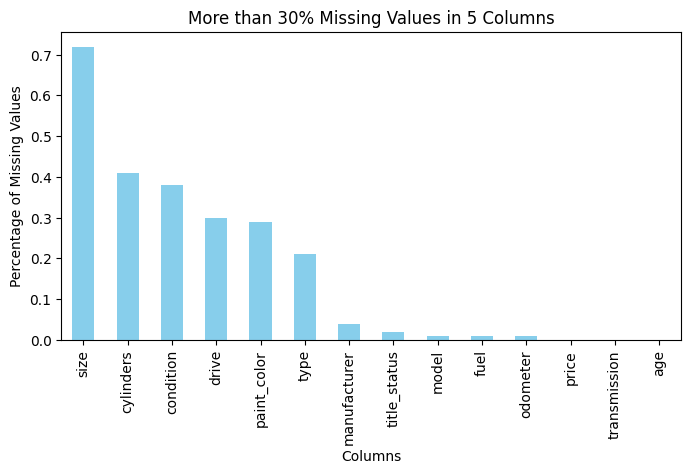

In [238]:
# KEY FINDINGS: more than 30% missing values in 5 columns
# 1. Lot of Missing Values for Size(72%), Cylinders(41%), Condition(38%), Drive(30%), Paint Color(29%), Type(21%)

print(vehicles_prelim.isna().mean().round(2).sort_values(ascending=False))

vehicles_prelim.isna().mean().round(2).sort_values(ascending=False).plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title('More than 30% Missing Values in 5 Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/missing_values_bar_chart.png')
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [239]:
# FEATURE SELECTION: STEP 1: Drop all nan values and create a new dataframe to be used for feature Selection
vehicles_base_feature = vehicles_prelim.dropna()
vehicles_base_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73390 entries, 31 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         73390 non-null  int64  
 1   manufacturer  73390 non-null  object 
 2   model         73390 non-null  object 
 3   condition     73390 non-null  object 
 4   cylinders     73390 non-null  object 
 5   fuel          73390 non-null  object 
 6   odometer      73390 non-null  float64
 7   title_status  73390 non-null  object 
 8   transmission  73390 non-null  object 
 9   drive         73390 non-null  object 
 10  size          73390 non-null  object 
 11  type          73390 non-null  object 
 12  paint_color   73390 non-null  object 
 13  age           73390 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 8.4+ MB


In [240]:
# FEATURE SELECTION: STEP 2: Train Test Split

X = vehicles_base_feature.drop("price", axis=1)
y = np.log(vehicles_base_feature["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Training set shape: (58712, 13)
Test set shape: (14678, 13)
Training target shape: (58712,)
Test target shape: (14678,)


In [241]:
# FEATURE SELECTION: STEP 3: Identify numerical and categorical features
numer_features = ['age', 'odometer']
categ_features = ["fuel", "manufacturer", "model", "condition", "cylinders", "drive", "size", "type", "paint_color", "transmission", 'title_status']

In [242]:
# Creating Pipelines and ColumnTransformer for preprocessing
# Numerical features will be scaled and polynomial features will be created

numer_pipeline = Pipeline([('poly', PolynomialFeatures(degree=5, include_bias=False)),('scaler', StandardScaler())])
categ_pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Combining numerical and categorical features into a single pipeline
preprocess = ColumnTransformer(transformers=[('numer', numer_pipeline, numer_features), ('categ', categ_pipeline, categ_features)])


In [243]:
# Creating the final pipeline with preprocessing and Linear Regression model
total_pipeline = Pipeline([('preprocess', preprocess),('linmodel', LinearRegression())])

In [244]:
total_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numer',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('categ',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fuel', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'drive', 'size',
                                                   'type', 'paint_color',
                                                   'transmission',
                                                   'title_status'])])),
                ('linmodel', LinearRegression())])

In [245]:
# Create an encoded dataframe with all the features
vehicles_encoded = pd.get_dummies(vehicles_base_feature, columns=categ_features, drop_first=True)
vehicles_encoded = vehicles_encoded.astype(int)
vehicles_encoded

,price,odometer,age,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,...,paint_color_silver,paint_color_white,paint_color_yellow,transmission_manual,transmission_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
31,15000,128000,12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,19900,88000,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,14000,95000,13,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
65,22500,144700,24,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
73,15000,90000,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,15999,36465,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426808,18000,130000,20,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426809,18000,114400,35,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426831,9800,115000,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


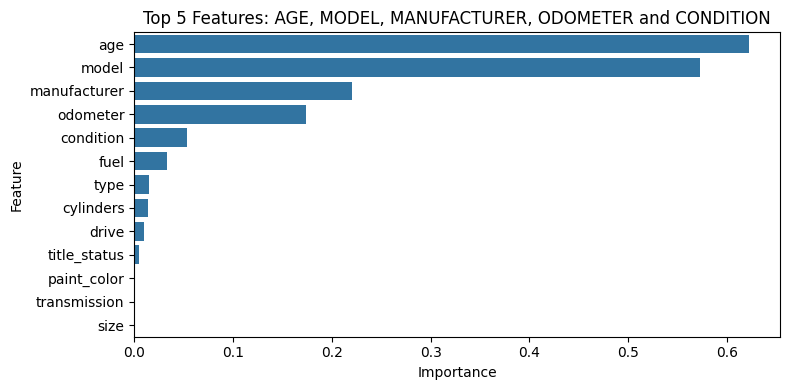

,feature,importance
12,age,0.62
1,model,0.57
0,manufacturer,0.22
5,odometer,0.17
2,condition,0.05
4,fuel,0.03
10,type,0.01
3,cylinders,0.01
8,drive,0.01
6,title_status,0.01


In [246]:

# KEY FINDINGS: 5 Top Features identified using Permutation Importance
# 1. Age, Model, Manufacturer, Odometer, condition are the most important features to be considered for predicting the used car prices.

# FEATURE SELECTION: STEP 4: Selecting the best features using Permutation Importance

from sklearn.inspection import permutation_importance
result = permutation_importance(total_pipeline, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': result.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=importance_df.head(13))
plt.title('Top 5 Features: AGE, MODEL, MANUFACTURER, ODOMETER and CONDITION')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/top_5_features_permutation_importance.png')
plt.show()
importance_df.round(2)

In [247]:
# FINAL STEP: Preparing the Final Dataframe before modelling with top 5 important features 
# Now that we know the important features, I will prepare the dataframe with only top 5 important features
# Since there are a lot of missing values: In the modelling dataset, i will retain ~60% of my original datatset(After removing price below 1K and above 500K)

vehicles_base_model = vehicles_prelim[['price', 'age', 'odometer', 'manufacturer', 'model', 'condition']].dropna()
vehicles_base_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 223016 entries, 27 to 426879
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         223016 non-null  int64  
 1   age           223016 non-null  float64
 2   odometer      223016 non-null  float64
 3   manufacturer  223016 non-null  object 
 4   model         223016 non-null  object 
 5   condition     223016 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 11.9+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [248]:
# Defining the Features and the Target Variable
# Features: Age, Odometer, Manufacturer, Model, Condition
# Target Variable: Price (log-transformed)

X = vehicles_base_model.drop("price", axis=1)
y = np.log(vehicles_base_model["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train_shape: {X_train.shape}")
print(f"X_test_shape: {X_test.shape}")
print(f"y_train_shape: {y_train.shape}")
print(f"y_test_shape: {y_test.shape}")

X_train_shape: (178412, 5)
X_test_shape: (44604, 5)
y_train_shape: (178412,)
y_test_shape: (44604,)


In [249]:
# Defining the numerical and categorical features

numerical_features = ['age', 'odometer']
categorical_features = ["manufacturer", "model", "condition"]

In [250]:
# Creating Pipelines for numerical and categorical features

num_pipeline = Pipeline([('poly', PolynomialFeatures(degree=5, include_bias=False)),('scaler', StandardScaler())])
cat_pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [251]:
# Combining numerical and categorical features into a single ColumnTransformer

preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, numerical_features),('cat', cat_pipeline, categorical_features)])

In [252]:
linear_pipeline = Pipeline([('preprocessing', preprocessor),('linmodel', LinearRegression())])
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'model',
                                                   'condition'])])),
                ('linmodel', LinearRegression())])

In [253]:
# Linear Regression Model Evaluation: Checking the MSE and R^2 Score on Train and Test Data
train_pred = linear_pipeline.predict(X_train)
test_pred = linear_pipeline.predict(X_test)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
print(f"Linear Train MSE: {train_mse:.3f}")
print(f"Linear Test MSE: {test_mse:.3f}")

# check the model score
train_score = linear_pipeline.score(X_train, y_train)
test_score = linear_pipeline.score(X_test, y_test)
print(f"Linear Train Score: {train_score:.3f}")
print(f"Linear Test Score: {test_score:.3f}")

Linear Train MSE: 0.078
Linear Test MSE: 0.104
Linear Train Score: 0.887
Linear Test Score: 0.850


In [254]:
# Ridge Regression Model Evaluation: Checking the MSE and R^2 Score on Train and Test Data

ridge_pipeline = Pipeline([('preprocessing', preprocessor),('ridge_model', Ridge())])
ridge_pipeline.fit(X_train, y_train)
ridge_train_pred = ridge_pipeline.predict(X_train)
ridge_test_pred = ridge_pipeline.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
print(f"Ridge Train MSE: {ridge_train_mse:.3f}")
print(f"Ridge Test MSE: {ridge_test_mse:.3f}")
# check the model score
ridge_train_score = ridge_pipeline.score(X_train, y_train)
ridge_test_score = ridge_pipeline.score(X_test, y_test)
print(f"Ridge Train Score: {ridge_train_score:.3f}")
print(f"Ridge Test Score: {ridge_test_score:.3f}")

Ridge Train MSE: 0.084
Ridge Test MSE: 0.103
Ridge Train Score: 0.879
Ridge Test Score: 0.852


In [255]:
# Lasso Regression Model Evaluation: Checking the MSE and R^2 Score on Train and Test Data

lasso_pipeline = Pipeline([('preprocessing', preprocessor),('lasso_model', Lasso())])
lasso_pipeline.fit(X_train, y_train)
lasso_train_pred = lasso_pipeline.predict(X_train)
lasso_test_pred = lasso_pipeline.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
print(f"Lasso Train MSE: {lasso_train_mse:.3f}")
print(f"Lasso Test MSE: {lasso_test_mse:.3f}")
# check the model score
lasso_train_score = lasso_pipeline.score(X_train, y_train)
lasso_test_score = lasso_pipeline.score(X_test, y_test)
print(f"Lasso Train Score: {lasso_train_score:.3f}")
print(f"Lasso Test Score: {lasso_test_score:.3f}")

Lasso Train MSE: 0.692
Lasso Test MSE: 0.694
Lasso Train Score: 0.000
Lasso Test Score: -0.000


In [256]:
# Hyperparameter Tuning: Ridge Regression using GridSearchCV

ridge_pipeline = Pipeline([('preprocessing', preprocessor), ('ridge_model', Ridge())])

ridge_param_grid = {'ridge_model__alpha': np.logspace(-4, 4, 10)}
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_train_pred = best_ridge_model.predict(X_train)
best_ridge_test_pred = best_ridge_model.predict(X_test)
best_ridge_train_mse = mean_squared_error(y_train, best_ridge_train_pred)
best_ridge_test_mse = mean_squared_error(y_test, best_ridge_test_pred)
print(f"Best Ridge Train MSE: {best_ridge_train_mse:.3f}")
print(f"Best Ridge Test MSE: {best_ridge_test_mse:.3f}")
# check the best model score
best_ridge_train_score = best_ridge_model.score(X_train, y_train)
best_ridge_test_score = best_ridge_model.score(X_test, y_test)
print(f"Best Ridge Train Score: {best_ridge_train_score:.3f}")
print(f"Best Ridge Test Score: {best_ridge_test_score:.3f}")

# Calculating the Best Alpha Value for Ridge Regression
best_ridge_alpha = ridge_grid_search.best_params_['ridge_model__alpha']
print(f"Best Ridge Alpha: {best_ridge_alpha:.3f}")

Best Ridge Train MSE: 0.080
Best Ridge Test MSE: 0.102
Best Ridge Train Score: 0.884
Best Ridge Test Score: 0.853
Best Ridge Alpha: 0.359


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

                   Model  Train MSE  Test MSE  Train Score  Test Score
0      Linear Regression      0.078     0.104        0.887       0.850
1       Ridge Regression      0.084     0.103        0.879       0.852
2  Best Ridge Regression      0.080     0.102        0.884       0.853
3       Lasso Regression      0.692     0.694        0.000      -0.000


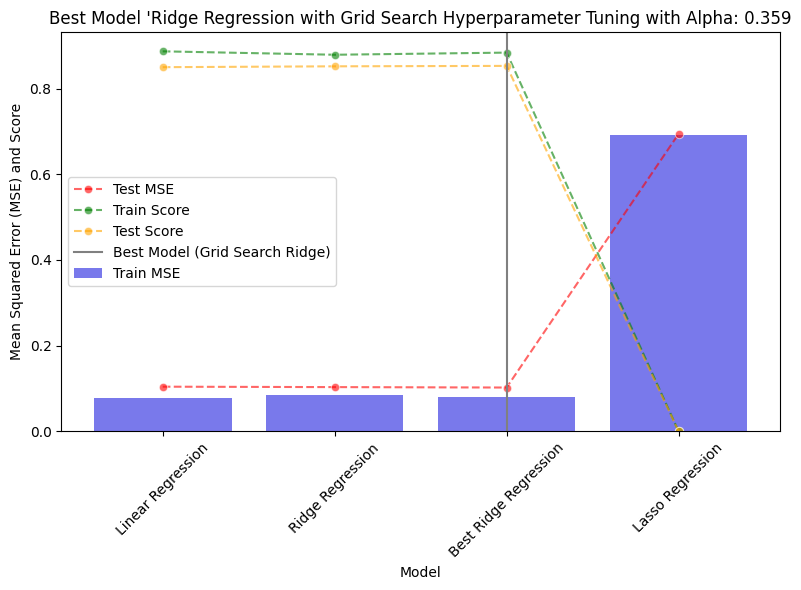

In [257]:
# KEY FINDINGS: RIDGE REGRESSION with Grid Search Hyperparameter Tuning is the best fit model and has the best Test MSE(0.102) and R^2 Score(0.853)
# A 0.853 R^2 Score indicates that the model is able to explain a significant portion of the variance in the target variable and is a good fit on the test data
# 1. The best Ridge Regression model has an alpha value of approximately 0.359
# Evaluating and Selecting the Best Model
mse_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Best Ridge Regression', 'Lasso Regression'],
    'Train MSE': [train_mse, ridge_train_mse, best_ridge_train_mse, lasso_train_mse],
    'Test MSE': [test_mse, ridge_test_mse, best_ridge_test_mse, lasso_test_mse],
    'Train Score': [train_score, ridge_train_score, best_ridge_train_score, lasso_train_score],
    'Test Score': [test_score, ridge_test_score, best_ridge_test_score, lasso_test_score]
}
mse_df = pd.DataFrame(mse_data, index=None).round(3)
print(mse_df)

# Plotting the MSE for all models using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(data=mse_df, x='Model', y='Train MSE', color='blue', alpha=0.6, label='Train MSE')
sns.lineplot(data=mse_df, x='Model', y='Test MSE', color='red', marker="o", ls="--", alpha=0.6, label='Test MSE')
sns.lineplot(data=mse_df, x='Model', y='Train Score', color='green', marker="o", ls="--", alpha=0.6, label='Train Score')
sns.lineplot(data=mse_df, x='Model', y='Test Score', color='orange', marker="o", ls="--", alpha=0.6, label='Test Score')
plt.title(f"Best Model 'Ridge Regression with Grid Search Hyperparameter Tuning with Alpha: {best_ridge_alpha:.3f}")
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE) and Score')

plt.axvline(x=2, color='gray', label='Best Model (Grid Search Ridge)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/model_comparison_mse_and_R^2.png')
plt.show()


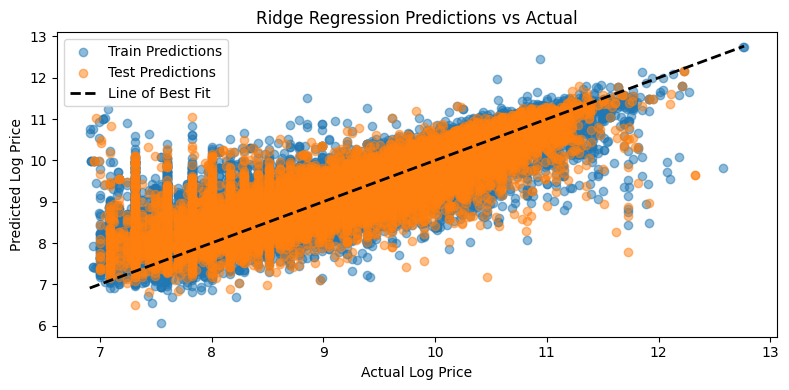

In [258]:
# KEY FINDINGS: The Test predictions fit well as shown in the plot below
# The scatter plot shows the relationship between actual log prices and predicted log prices for both training and test datasets

# plotting the line of best fit 
plt.figure(figsize=(8, 4))
plt.scatter(y_train, best_ridge_train_pred, alpha=0.5, label='Train Predictions')
plt.scatter(y_test, best_ridge_test_pred, alpha=0.5, label='Test Predictions')
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Line of Best Fit')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Ridge Regression Predictions vs Actual')
plt.legend()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/ridge_regression_predictions_vs_actual.png')
plt.tight_layout()
plt.show()

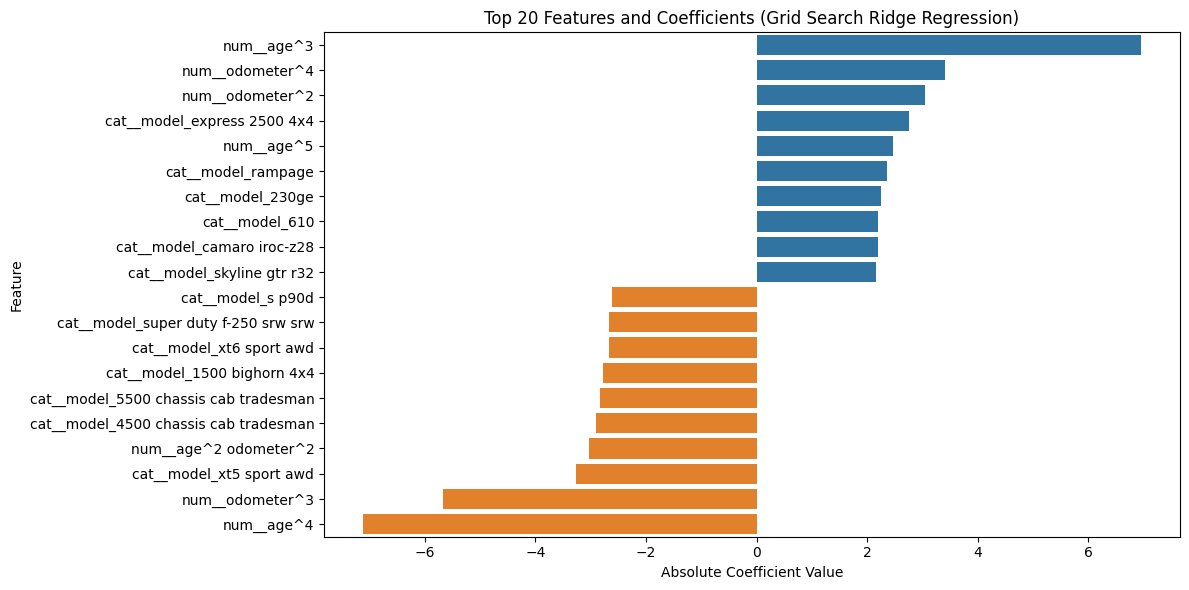

In [259]:
# Calculating the coefficients of the Ridge Regression model with GridSearchCV

ridge_coefficients = best_ridge_model.named_steps['ridge_model'].coef_
ridge_feature_names = best_ridge_model.named_steps['preprocessing'].get_feature_names_out()
ridge_importance = pd.DataFrame({'Feature': ridge_feature_names, 'Coefficient': ridge_coefficients})
ridge_importance = ridge_importance.sort_values(by='Coefficient', ascending=False)
ridge_importance

# Calculating the coefficients of the Ridge Regression model with GridSearchCV

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=ridge_importance.head(10))
sns.barplot(x='Coefficient', y='Feature', data=ridge_importance.tail(10))
plt.title('Top 20 Features and Coefficients (Grid Search Ridge Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/top_20_features_coefficients.png')
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [260]:
# create a new dataframe from the original dataframe with the actual and predicted prices
final_predictions = vehicles_base_model.copy() # type: ignore
final_predictions['Predicted Price'] = np.exp(best_ridge_model.predict(X)) # type: ignore
final_predictions['Predicted Price'] = final_predictions['Predicted Price'].round(2)
final_predictions['Price Difference'] = final_predictions['price'] - final_predictions['Predicted Price']
final_predictions['Price Difference Percentage'] = (final_predictions['Price Difference'] / final_predictions['price']) * 100
final_predictions = final_predictions.sort_values(by='price', ascending=False).reset_index(drop=True)
final_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223016 entries, 0 to 223015
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price                        223016 non-null  int64  
 1   age                          223016 non-null  float64
 2   odometer                     223016 non-null  float64
 3   manufacturer                 223016 non-null  object 
 4   model                        223016 non-null  object 
 5   condition                    223016 non-null  object 
 6   Predicted Price              223016 non-null  float64
 7   Price Difference             223016 non-null  float64
 8   Price Difference Percentage  223016 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 15.3+ MB


In [261]:
# Displaying the first few rows of the final predictions dataframe for Client Discussion

Sample_data = final_predictions.query("`Price Difference Percentage` <= 10 and `Price Difference Percentage` >= -10").round(2)
Sample_data.sample(5)

,price,age,odometer,manufacturer,model,condition,Predicted Price,Price Difference,Price Difference Percentage
174244,6950,19.0,105000.0,subaru,outback 2.5i,excellent,7038.37,-88.37,-1.27
124911,13500,8.0,48000.0,honda,civic ex hatchback,excellent,13789.43,-289.43,-2.14
39439,31590,8.0,51951.0,dodge,durango r/t sport utility,good,34229.93,-2639.93,-8.36
7001,44995,11.0,35091.0,chevrolet,corvette stingray,good,42185.82,2809.18,6.24
118433,14694,7.0,92221.0,chevrolet,equinox lt 1lt,excellent,15036.85,-342.85,-2.33


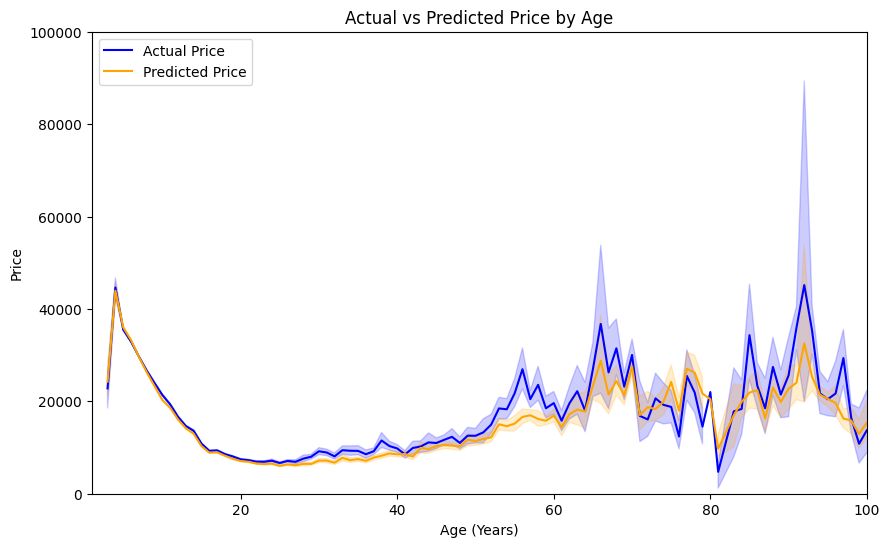

In [262]:
# KEY FINDINGS: Prices tend to go down as vehicles get older uptill an age of 25 Years, and post that it starts going up but there are exceptions 
# 1. older (50+ years) vehicles have higher prices due to "rarity" or "classic" status.

# visualize a smooth line plot between age and price and age and predicted price
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='price', data=final_predictions, label='Actual Price', color='blue')
sns.lineplot(x='age', y='Predicted Price', data=final_predictions, label='Predicted Price', color='orange')
plt.title('Actual vs Predicted Price by Age')
plt.xlim(1, 100) # Limit x-axis to 100 years for better visualization 
plt.ylim(0, 100000) # Limit y-axis to 150K for better visualization
plt.xlabel('Age (Years)')
plt.ylabel('Price')
plt.legend()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/age_vs_price_and_predicted_price.png')
plt.show()



/var/folders/qh/nl8_rwhs0m5fx3p4tbcvk7840000gn/T/ipykernel_3678/3510677608.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  odometer_group = final_predictions.groupby('Odometer Reading').agg({'price': 'mean', 'Predicted Price': 'mean'}).reset_index()


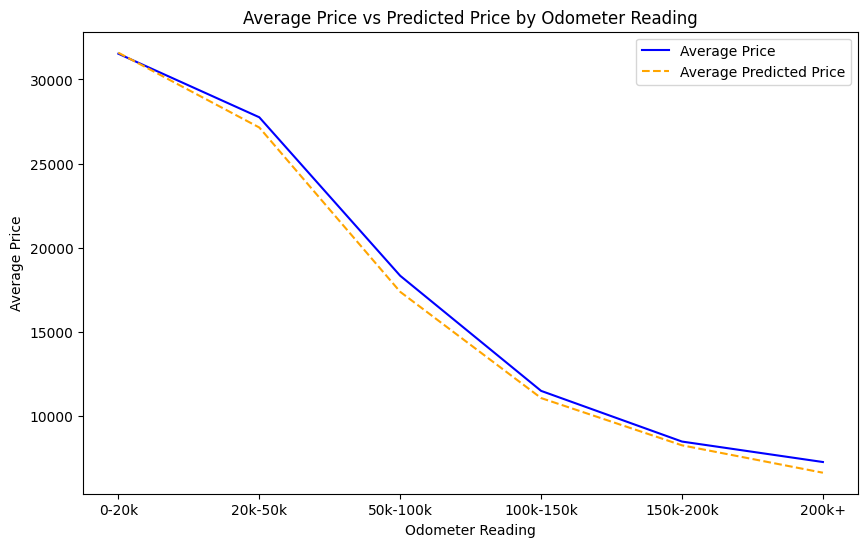

In [263]:
# create a column with odometer reading in categories
final_predictions['Odometer Reading'] = pd.cut(final_predictions['odometer'], bins=[0, 20000, 50000, 100000, 150000, 200000, np.inf], labels=['0-20k', '20k-50k', '50k-100k', '100k-150k', '150k-200k', '200k+'])
# group by odometer reading and calculate the average price and predicted price
odometer_group = final_predictions.groupby('Odometer Reading').agg({'price': 'mean', 'Predicted Price': 'mean'}).reset_index()
odometer_group.columns = ['Odometer Reading', 'Average Price', 'Average Predicted Price']
odometer_group
# Visualizing the average price and predicted price by odometer reading
plt.figure(figsize=(10, 6))
sns.lineplot(x='Odometer Reading', y='Average Price', data=odometer_group, color='blue', label='Average Price')
sns.lineplot(x='Odometer Reading', y='Average Predicted Price', data=odometer_group, color='orange', ls="--", label='Average Predicted Price')
plt.title('Average Price vs Predicted Price by Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Average Price')
plt.legend()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/odometer_reading_vs_price_and_predicted_price.png')
plt.show()

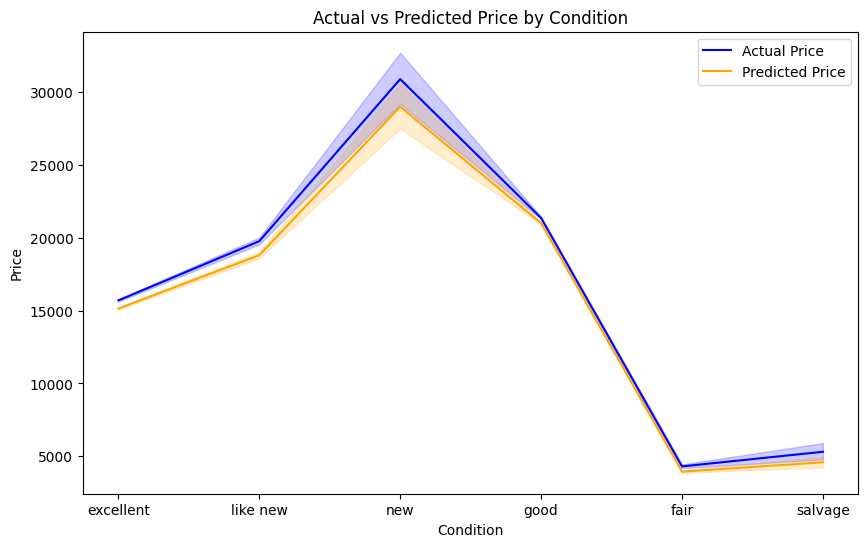

In [277]:
# KEY FINDINGS: The average price and predicted price by condition shows that:
# 1. The average price is highest for Cars in "New" condition, followed by "Good", and "Like New".
# 2. The average price is lowest for Cars in "Fair" and "Salvage" condition.
# 3. The predicted prices follow closely the actual prices, indicating that the model is able to capture the relationship between condition and price effectively.
# 4. Highest variation in prices for Cars in "New" condition

# Visualizing the actual and predicted prices by condition and arrange data in descending order of average price
plt.figure(figsize=(10, 6))
sns.lineplot(x='condition', y='price', data=final_predictions, label='Actual Price', color='blue')
sns.lineplot(x='condition', y='Predicted Price', data=final_predictions, label='Predicted Price', color='orange')
plt.title('Actual vs Predicted Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.legend()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/condition_vs_price_and_predicted_price.png')
plt.show()

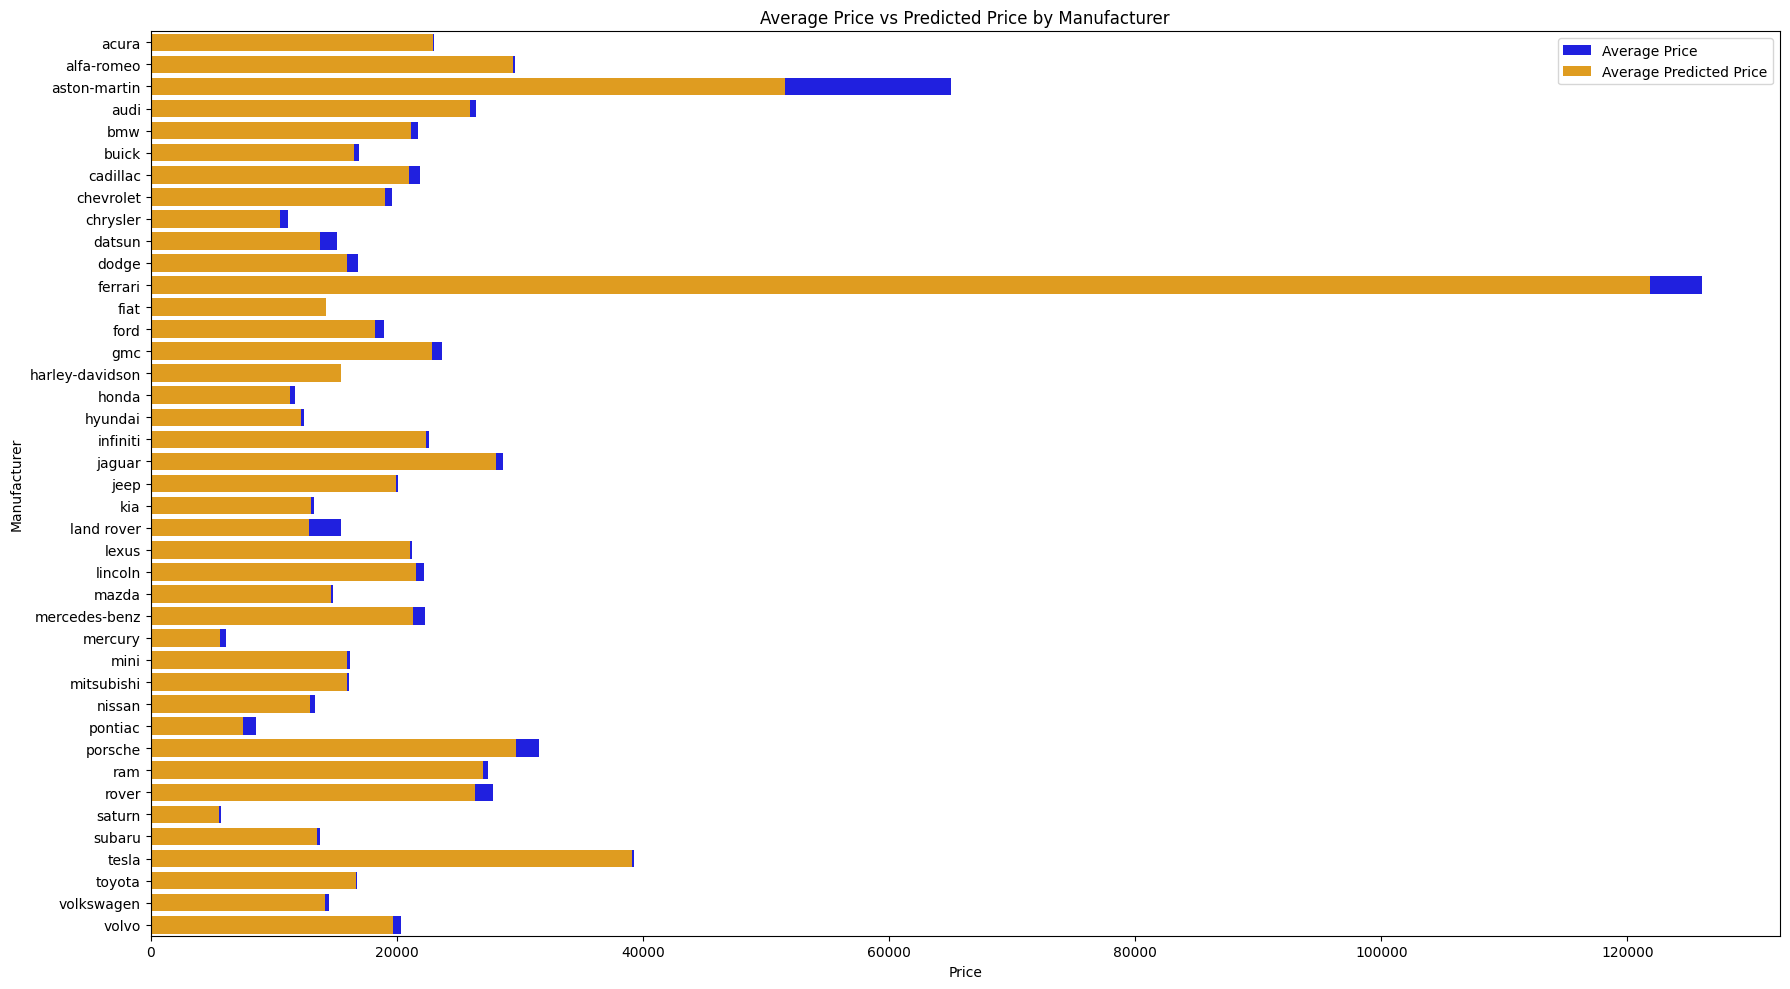

In [269]:

# KEY FINDINGS: 
# Predicted Prices tend be within 5%-10% range for regular vehicles, 
# "Luxury", "rarity" or "classic" cars have more fluctuations and wider ranges.

# group by manufacturer and calculate the average price and predicted price
manufacturer_group = final_predictions.groupby('manufacturer').agg({'price': 'mean', 'Predicted Price': 'mean'}).reset_index()
manufacturer_group.columns = ['Manufacturer', 'Average Price', 'Average Predicted Price']

manufacturer_group
# Visualizing the average price and predicted price by manufacturer
plt.figure(figsize=(18, 10))
sns.barplot(x='Average Price', y='Manufacturer', data=manufacturer_group, color='blue', label='Average Price')
sns.barplot(x='Average Predicted Price', y='Manufacturer', data=manufacturer_group, color='orange', label='Average Predicted Price')
plt.title('Average Price vs Predicted Price by Manufacturer')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.legend()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/manufacturer_vs_price_and_predicted_price.png')
plt.tight_layout()
plt.show()



              Range  Number of Cars  Percentage
0         Within 5%           72209       32.38
1        Within 10%          111197       49.86
2        Within 15%          139275       62.45
3  Greater than 15%           83741       37.55


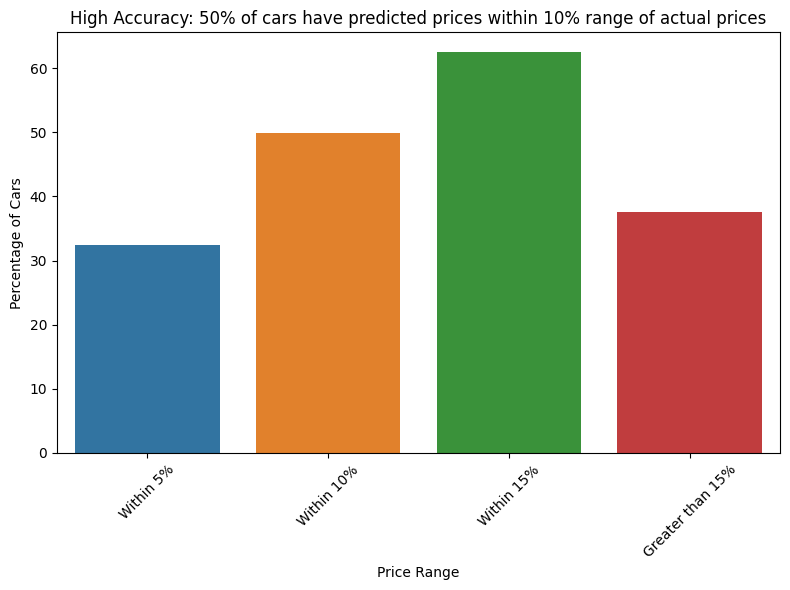

In [270]:
# KEY FINDINGS: 'High Accuracy: 50% of cars have predicted prices within 10% range of actual prices'

# from final_predicts dataframe, calculate how many cars are within a range of 5%, 10% and 15% and greater than 15% of the actual price with age less than 25 and over 25
final_predictions['Within 5%'] = np.abs(final_predictions['Price Difference Percentage']) <= 5
final_predictions['Within 10%'] = np.abs(final_predictions['Price Difference Percentage']) <= 10
final_predictions['Within 15%'] = np.abs(final_predictions['Price Difference Percentage']) <= 15
final_predictions['Greater than 15%'] = np.abs(final_predictions['Price Difference Percentage']) > 15

# calculate the number of cars within each range
within_5 = final_predictions['Within 5%'].sum()
within_10 = final_predictions['Within 10%'].sum()
within_15 = final_predictions['Within 15%'].sum()
greater_than_15 = final_predictions['Greater than 15%'].sum()
# calculate the percentage of cars within each range
total_cars = final_predictions.shape[0]
within_5_percentage = (within_5 / total_cars) * 100
within_10_percentage = (within_10 / total_cars) * 100
within_15_percentage = (within_15 / total_cars) * 100
greater_than_15_percentage = (greater_than_15 / total_cars) * 100
# create a dataframe with the results
accuracy_df = pd.DataFrame({
    'Range': ['Within 5%', 'Within 10%', 'Within 15%', 'Greater than 15%'],
    'Number of Cars': [within_5, within_10, within_15, greater_than_15],
    'Percentage': [within_5_percentage, within_10_percentage, within_15_percentage, greater_than_15_percentage]
})
accuracy_df = accuracy_df.round(2)
print(accuracy_df)
# Visualizing the accuracy of the model
plt.figure(figsize=(8, 6))
sns.barplot(x='Range', y='Percentage', data=accuracy_df, hue="Range")
plt.title('High Accuracy: 50% of cars have predicted prices within 10% range of actual prices')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/model_accuracy.png')
plt.show()

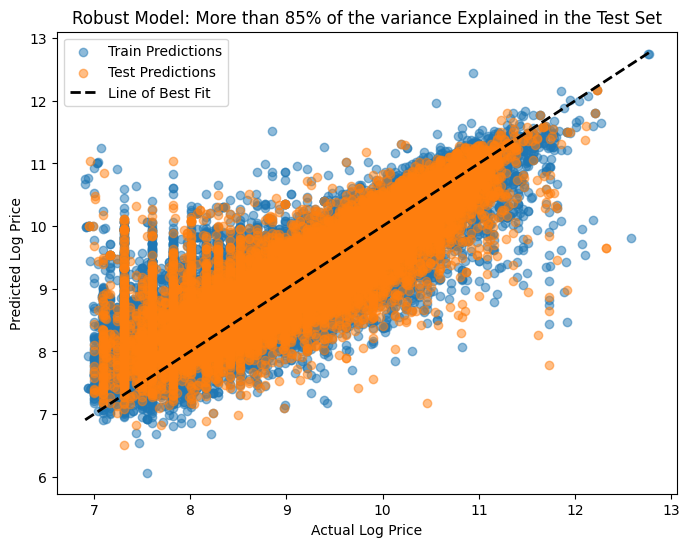

In [271]:
# KEY FINDINGS: The model is able to predict the prices of used cars with high accuracy.
# The test Results show a excellent performance and matches well with the actual prices. 

# plotting the line of best fit 
plt.figure(figsize=(8, 6))
plt.scatter(y_train, best_ridge_train_pred, alpha=0.5, label='Train Predictions')
plt.scatter(y_test, best_ridge_test_pred, alpha=0.5, label='Test Predictions')
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Line of Best Fit')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Robust Model: More than 85% of the variance Explained in the Test Set')
plt.legend()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/ridge_regression_predictions_vs_actual_robust_model.png')
plt.show()

In [273]:
print("""# RESULTS / CONCLUSION:
      
# AGE, MODEL, MANUFACTURER, ODOMETER and CONDITION are the top 5 variables which determines the used car prices
# These features explain 85% of the variance in car Prices (Test R^2 of 0.853)
# Car Prices drops sharply with age initially till 25 yrs (More the age, less the price)
# Prices tend to go up slightly after 25+ years. For 50+ - 70 years, the prices go up, may be, because of cars being more “Rare” or “classic” (Need to discuss with the Car Dealer on this spike in prices)
# Car prices tend to go down with higher Odometer readings (More the Odometer reading, less the price). However, this may not apply for “Classic” or “Rare” cars
# The average Predicted Prices follow very closely the actual prices for different Odometer ranges (Plotted in Jupyter notebook)
# Cars with "New" condition have the highest average price, followed by "Good", "Like New".... "Fair" and "Salvage" conditions cars have lowest prices.
# Highest variation in Actual and Predicted prices for Cars in "New" condition.
# Model does a great job closely following the actual prices by Manufacturer (Plotted in the Jupyter Notebook)
# ACCURACY: 33% of car prices are predicted within 5% range of actual prices, 50% of the car prices are predicted within 10% range and 63% within 15% range.
# Create a web Interface for Used car Dealers where they can input the Car data and get the Price of the car using this model""")


# RESULTS / CONCLUSION:

# AGE, MODEL, MANUFACTURER, ODOMETER and CONDITION are the top 5 variables which determines the used car prices
# These features explain 85% of the variance in car Prices (Test R^2 of 0.853)
# Car Prices drops sharply with age initially till 25 yrs (More the age, less the price)
# Prices tend to go up slightly after 25+ years. For 50+ - 70 years, the prices go up, may be, because of cars being more “Rare” or “classic” (Need to discuss with the Car Dealer on this spike in prices)
# Car prices tend to go down with higher Odometer readings (More the Odometer reading, less the price). However, this may not apply for “Classic” or “Rare” cars
# The average Predicted Prices follow very closely the actual prices for different Odometer ranges (Plotted in Jupyter notebook)
# Cars with "New" condition have the highest average price, followed by "Good", "Like New".... "Fair" and "Salvage" conditions cars have lowest prices.
# Highest variation in Actual and Predicted price

In [274]:
print("""The objective is to help the Used Car Dealers to make the Data Driven informed decisions on negotiating the Car Prices and maximize the margins""")


The objective is to help the Used Car Dealers to make the Data Driven informed decisions on negotiating the Car Prices and maximize the margins


In [275]:
# BELOW IS APPENDIX SHOWING POLYNOMIAL DEGREES AND THEIR IMPACT ON THE MODEL PERFORMANCE

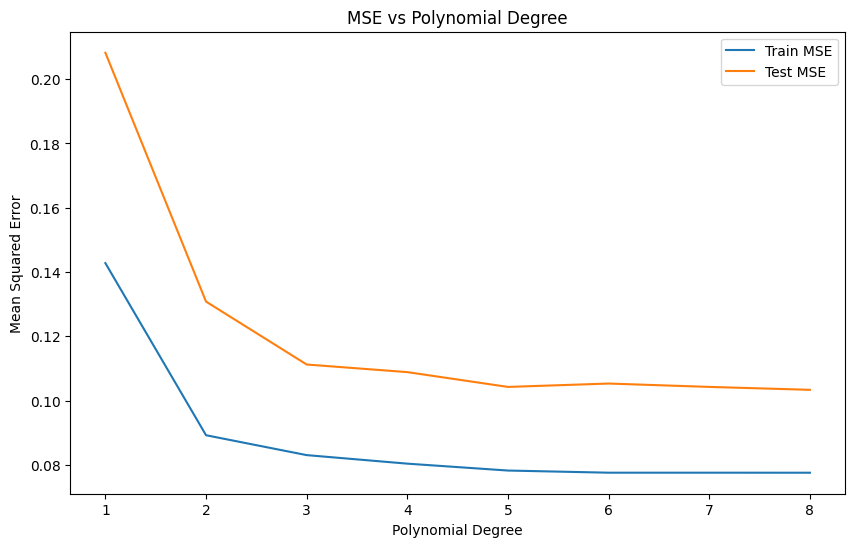

In [276]:
# Evailuating the model with different polynomial degrees to see how it affects the MSE

degrees = [1, 2, 3, 4, 5, 6, 7, 8]
results = []
for degree in degrees:
    num_pipeline = Pipeline([('poly', PolynomialFeatures(degree=degree, include_bias=False)), ('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, numerical_features), ('cat', cat_pipeline, categorical_features)])
    total_pipeline = Pipeline([('preprocessing', preprocessor), ('linmodel', LinearRegression())])
    
    total_pipeline.fit(X_train, y_train)
    train_pred = total_pipeline.predict(X_train)
    test_pred = total_pipeline.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    results.append((degree, train_mse, test_mse))
results_df = pd.DataFrame(results, columns=['degree', 'train_mse', 'test_mse'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='degree', y='train_mse', label='Train MSE')
sns.lineplot(data=results_df, x='degree', y='test_mse', label='Test MSE')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('/Users/deepakkaushik/Desktop/UC Berkeley Assignments PCMLAI/Practical Application II/practical_application_II_starter/images - Analysis/best_polynomial_degree.png')
plt.show()
